# Basic Boosters

* [AdaBoost](#AdaBoost)
* [GradientBoost](#GradientBoost)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.facecolor']='w'

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [3]:
teledf = pd.read_csv('data/teledf_final.csv', index_col = 0)
teledf.head()

,Total day charge,Total intl calls,Area code_415,Area code_510,Total eve minutes,Total day minutes,Total day calls,Voice mail plan,Area code_408,Customer service calls,International plan,Churn,Number vmail messages,Total intl minutes,Total intl charge,Total eve charge
0,45.07,3.0,1.0,0.0,197.4,265.1,110.0,1.0,0.0,1.0,0.0,0.0,25.0,10.0,2.70,16.78
1,27.47,3.0,1.0,0.0,195.5,161.6,123.0,1.0,0.0,1.0,0.0,0.0,26.0,13.7,3.70,16.62
2,41.38,5.0,1.0,0.0,121.2,243.4,114.0,0.0,0.0,0.0,0.0,0.0,0.0,12.2,3.29,10.30
3,50.90,7.0,0.0,0.0,61.9,299.4,71.0,0.0,1.0,2.0,1.0,0.0,0.0,6.6,1.78,5.26
4,28.34,3.0,1.0,0.0,148.3,166.7,113.0,0.0,0.0,3.0,1.0,0.0,0.0,10.1,2.73,12.61


In [4]:
X = teledf.drop(columns = 'Churn')
y = teledf.Churn

In [5]:
X_rest, X_test, y_rest, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_rest, y_rest, test_size = 0.2, random_state = 42)

# AdaBoost

In [18]:

ada_model  = AdaBoostClassifier(random_state = 42)

ada_model.fit(X_train, y_train.values.ravel())
y_train_ada_pred = ada_model.predict(X_train)
ada_model.score(X_train,y_train), ada_model.score(X_val, y_val)


(0.8916510318949343, 0.8632958801498127)

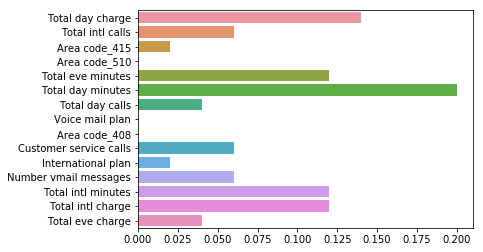

In [8]:
sns.barplot(y=X.columns,x=ada_model.feature_importances_)


Text(0.5, 1.0, 'Confusion Matrix for AdaBoost')

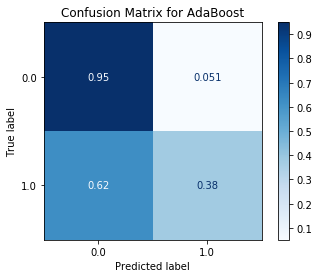

In [17]:
plot_confusion_matrix(ada_model, 
                      X_val,
                      y_val,
                      cmap= 'Blues', 
                      normalize = 'true')
plt.title('Confusion Matrix for AdaBoost')

# GradientBoost

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
gb_model = GradientBoostingClassifier(random_state = 42)
gb_model.fit(X_train, y_train)
gb_model.score(X_train, y_train), gb_model.score(X_val, y_val)

(0.9718574108818011, 0.947565543071161)

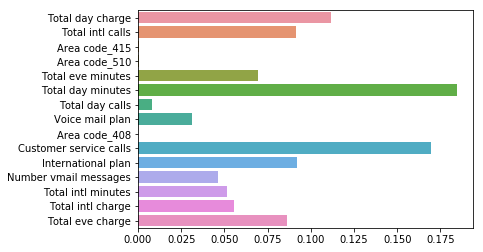

In [16]:
sns.barplot(y=X.columns, x=gb_model.feature_importances_)

Text(0.5, 1.0, 'Confusion Matrix for GradientBoost')

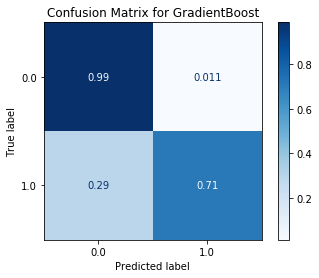

In [19]:
plot_confusion_matrix(gb_model, 
                      X_val,
                      y_val,
                      cmap='Blues', 
                      normalize='true')
plt.title('Confusion Matrix for GradientBoost')